In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [34]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ethans/Datasets/titanic_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ethans/Datasets/titanic_test.csv')

In [35]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
full_data = train_data.append(test_data)
full_data.head()

<ipython-input-37-064adb5e6d6e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_data = train_data.append(test_data)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
full_data.shape

(1309, 12)

**Dataset Description**

The Titanic dataset contains information about the passengers aboard the RMS Titanic, a famous ship that sank in 1912. Here is a description of the columns in the dataset:

PassengerId: A unique identifier for each passenger.

Survived: Indicates whether the passenger survived or not. (0 = No, 1 = Yes)

Pclass: The passenger class or ticket class. (1 = First class, 2 = Second class, 3 = Third class)

Name: The name of the passenger.

Sex: The gender of the passenger.

Age: The age of the passenger in years. It may contain decimal values for infants.

SibSp: The number of siblings/spouses aboard the Titanic.

Parch: The number of parents/children aboard the Titanic.

Ticket: The ticket number.

Fare: The fare or the price paid for the ticket.

Cabin: The cabin number of the passenger. (Some entries may be NaN, indicating missing values)

Embarked: The port of embarkation. (C = Cherbourg, Q = Queenstown, S = Southampton)

Each row in the dataset represents a passenger, and each column provides different information about the passengers. This dataset is often used for tasks such as predicting passenger survival based on the available features.

In [39]:
y_train = train_data['Survived']

In [40]:
train_data = train_data.drop('Survived',axis = 1)

In [41]:
 full_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
drop_columns = ['PassengerId','Name','Age','SibSp','Ticket','Cabin','Parch','Embarked']
full_data.drop(labels = drop_columns, axis = 1, inplace = True)

In [43]:
full_data.head()

,Survived,Pclass,Sex,Fare
0,0.0,3,male,7.2500
1,1.0,1,female,71.2833
2,1.0,3,female,7.9250
3,1.0,1,female,53.1000
4,0.0,3,male,8.0500


In [44]:
full_data = pd.get_dummies(full_data, columns = ['Sex'], drop_first = True)

In [45]:
full_data.head()

,Survived,Pclass,Fare,Sex_male
0,0.0,3,7.2500,1
1,1.0,1,71.2833,0
2,1.0,3,7.9250,0
3,1.0,1,53.1000,0
4,0.0,3,8.0500,1


In [46]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Fare      1308 non-null   float64
 3   Sex_male  1309 non-null   uint8  
dtypes: float64(2), int64(1), uint8(1)
memory usage: 42.2 KB


In [56]:
full_data['Survived'].fillna(value = 0, inplace = True)

In [57]:
full_data.isnull().sum()

Survived    0
Pclass      0
Fare        0
Sex_male    0
dtype: int64

In [58]:
full_data['Survived'].value_counts()

0.0    967
1.0    342
Name: Survived, dtype: int64

In [59]:
full_data.head()

,Survived,Pclass,Fare,Sex_male
0,0.0,3,7.2500,1
1,1.0,1,71.2833,0
2,1.0,3,7.9250,0
3,1.0,1,53.1000,0
4,0.0,3,8.0500,1


In [70]:
X = full_data.drop('Survived', axis = 1)
y = full_data['Survived']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [72]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
lr_list = [0.05,0.075,0.1,0.25,0.5,0.75,1]

for each in lr_list:
  model = GradientBoostingClassifier(n_estimators = 50, learning_rate = each, max_features = 4, max_depth = 6, random_state = 0)
  model.fit(X_train,y_train)

  print("Learning Rate: ",each)
  print("Traning Score: ",model.score(X_train,y_train))
  print("Testing Score: ",model.score(X_test,y_test))
  print("\n\n")

Learning Rate:  0.05
Traning Score:  0.8443170964660937
Testing Score:  0.7900763358778626



Learning Rate:  0.075
Traning Score:  0.8567335243553008
Testing Score:  0.7977099236641222



Learning Rate:  0.1
Traning Score:  0.8691499522445081
Testing Score:  0.7977099236641222



Learning Rate:  0.25
Traning Score:  0.87774594078319
Testing Score:  0.8015267175572519



Learning Rate:  0.5
Traning Score:  0.8796561604584527
Testing Score:  0.8053435114503816



Learning Rate:  0.75
Traning Score:  0.8796561604584527
Testing Score:  0.7862595419847328



Learning Rate:  1
Traning Score:  0.8796561604584527
Testing Score:  0.7977099236641222





In [77]:
new_model = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.5, max_features = 4, max_depth = 6, random_state = 0)
new_model.fit(X_train,y_train)
y_pred = new_model.predict(X_test)

In [86]:
from sklearn.metrics import classification_report
print("Classification Report: \n")
print(classification_report(y_test,y_pred))

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.81      0.95      0.88       189
         1.0       0.76      0.44      0.56        73

    accuracy                           0.81       262
   macro avg       0.79      0.69      0.72       262
weighted avg       0.80      0.81      0.79       262



In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

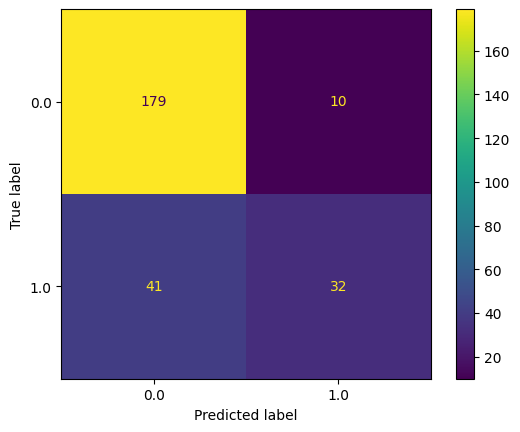

In [81]:
cm = confusion_matrix(y_test, y_pred, labels=new_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=new_model.classes_)
disp.plot()

In [85]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.8053435114503816
